In [91]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import random

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv("/content/drive/MyDrive/movie_ratings.csv")

In [69]:
df

,Unnamed: 0,userId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
0,0,1.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,605,606.0,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,606,607.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,607,608.0,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,608,609.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Complete the following:</h1>
<ol>
  <li>Calculate the mean and the standard deviation for each movie's rankings.</li>
  <li>Normalize rankings by user and update the dataframe with the normalized rankings.</li>
    <ul>
      <li>Remember that the formula for normalization is (x - x_min)/(x_max - x_min).</li>
      <li>Use <strong>.loc[]</strong> to get the list of user's reviews.</li>
      <li>Hint: make sure when you get the user's reviews, you are not also normalizing based on their user ID.</li>
    </ul>
  <li>Use the elbow method to find the best number of clusters to organize the data into for KMeans clustering.</li>
    <ul>
      <li>The code for doing this can be found in <strong>Day 4 Notebook</strong>.</li>
      <li>Documentation for KMeans clustering can be found <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">here</a>.</li>
    </ul>
  <li>Conduct a Grid Search using the selected k value for the hyperparameters <strong>init</strong> and <strong>random_state</strong></li>
    <ul>
      <li>The code for running a grid search is in <strong>Day 3 Notebook</strong></li>
      <li>The documentation for the different hyperparameters can be found <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">here</a>.</li>
    </ul>
  <li>Train a KMeans model using the k value and hyperparameters found previously to group the users based off their interest in different movies.</li>
    <ul>
      <li>The code to do this can be found in <strong>Day 4 Notebook</strong>.</li>
    </ul>
  <li>Select two movies at random and plot all of the users rankings for them in a scatter plot, color-coding them by cluster.</li>
    <ul>
      <li>The code for a scatter plot can be found in <strong>Day 1 Notebook</strong>.</li>
      <li>The color-coding can be seen done in <strong>Day 4 Notebook</strong>.</li>
      <li>Try a whole variety of different movie combinations -- see if there are any that result in very clear distinctions between cluster groups.</li>
    </ul>
</ol>
<br /><br />
Try your best to tackle these problems step by step. Ask for help. Every package and function you need is imported and every line of code necessary to complete this project can be found within the lecture notebooks. Take a deep breath -- you all have the skills to do this!

In [70]:
moviesOnly = df.loc[:, "Toy Story (1995)" : "Andrew Dice Clay: Dice Rules (1991)"]

In [71]:
means = moviesOnly.mean(axis=0)

In [72]:
stds = moviesOnly.std(axis=0)

In [73]:
scaler = MinMaxScaler()
scaler.fit(moviesOnly.T)
moviesOnly = scaler.transform(moviesOnly.T).T
moviesOnly

array([[0.8 , 0.  , 0.8 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.5 , 0.4 , 0.4 , ..., 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [151]:
data = np.array(moviesOnly).T
kmeans = KMeans(n_clusters = 3).fit(moviesOnly)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2,

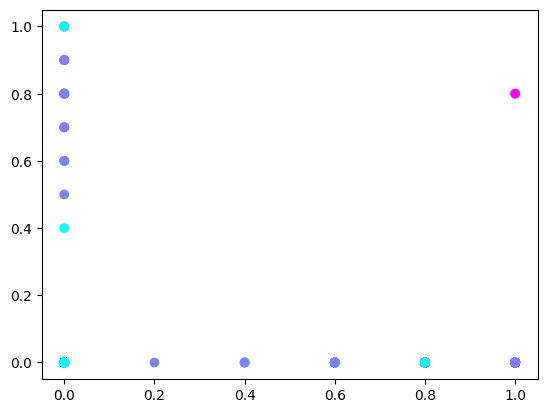

In [82]:
plt.scatter(moviesOnly[0], moviesOnly[1], c = kmeans.labels_, cmap = "cool")
plt.show()

In [152]:
inertias = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i).fit(moviesOnly)
  inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

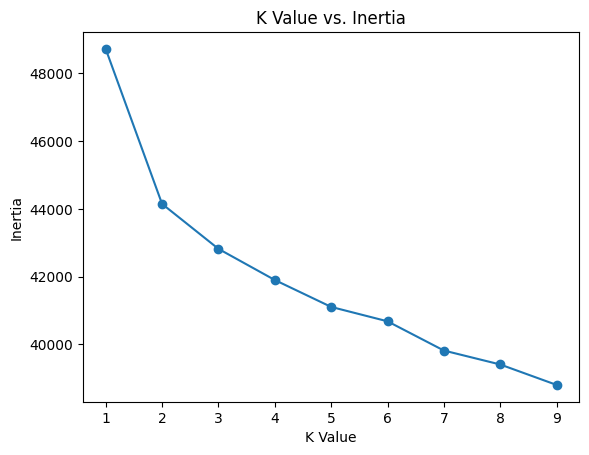

In [153]:
plt.scatter(np.arange(1,10), inertias)
plt.plot(np.arange(1,10), inertias)
plt.title("K Value vs. Inertia")
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.show()

In [154]:
kmeans = KMeans(n_clusters = 3)
param_grid = {'init': ['k-means++', 'random'], 'random_state': [0, 3]}
grid_search = GridSearchCV(kmeans, param_grid)

In [155]:
grid_search.fit(moviesOnly)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(estimator=KMeans(n_clusters=3),
             param_grid={'init': ['k-means++', 'random'],
                         'random_state': [0, 3]})

In [156]:
grid_search.best_params_

{'init': 'k-means++', 'random_state': 0}

In [157]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(moviesOnly)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [173]:
titles = list(df.columns.values)[2:]
print(titles)
print(len(titles))

['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)', 'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)', 'Now and Then (1995)', 'Persuasion (1995)', 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Dangerous Minds (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Babe (1995)', 'Dead Man Walking (1995)', 'It Takes Two (1995)', 'Clueless (1995)', 'Cry, the Beloved Country (1995)', 'Richard III (1995)', 'Dea

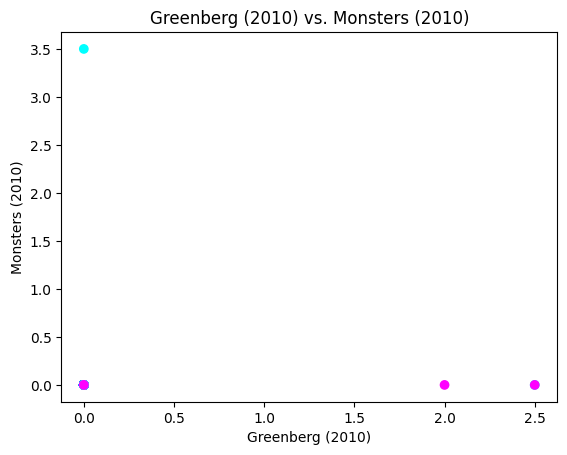

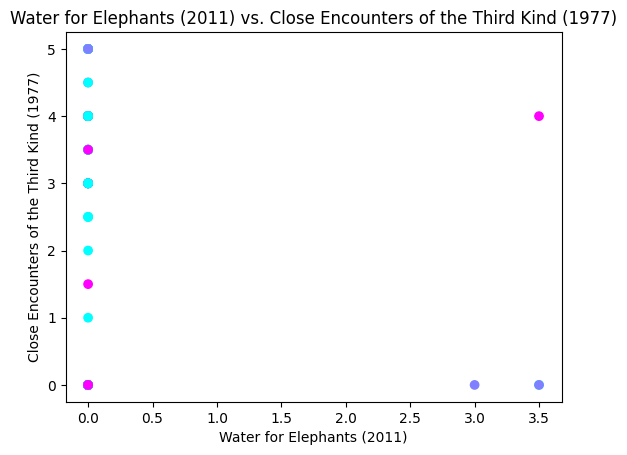

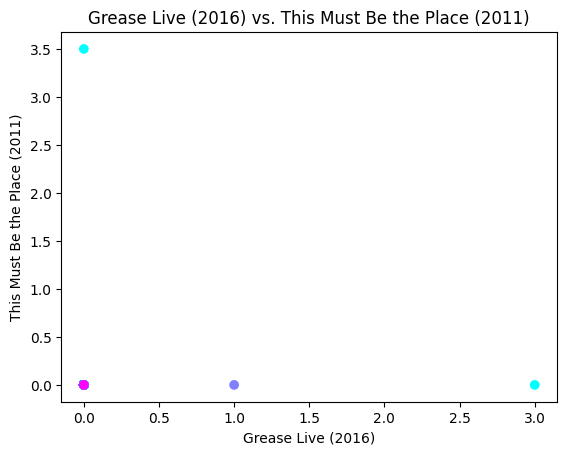

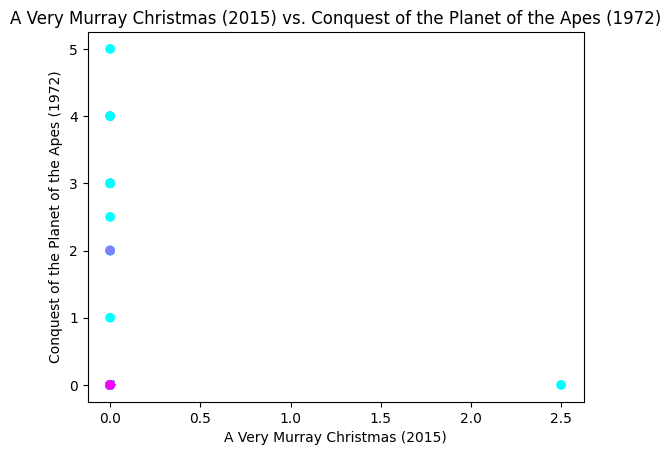

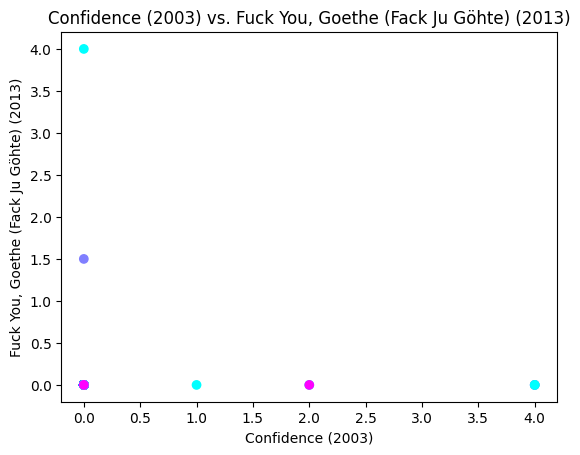

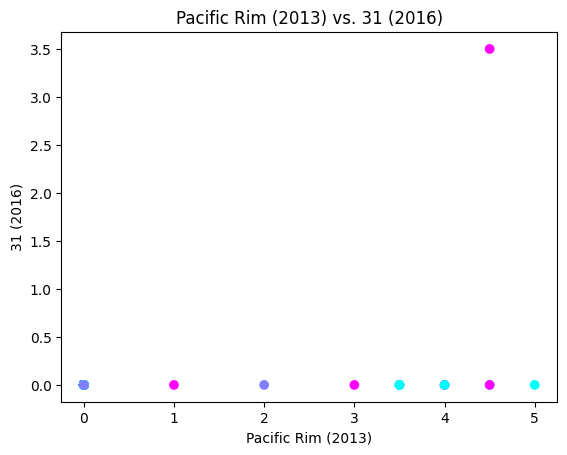

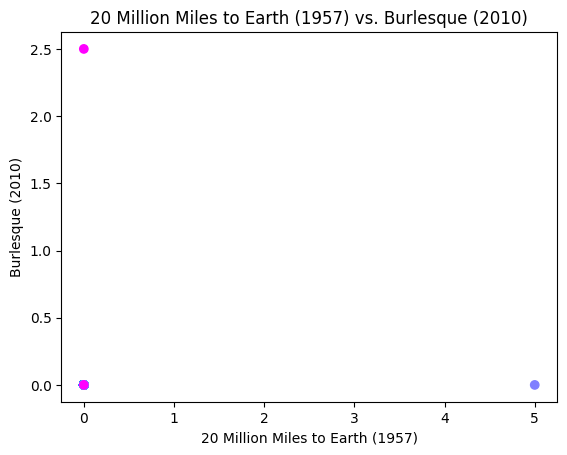

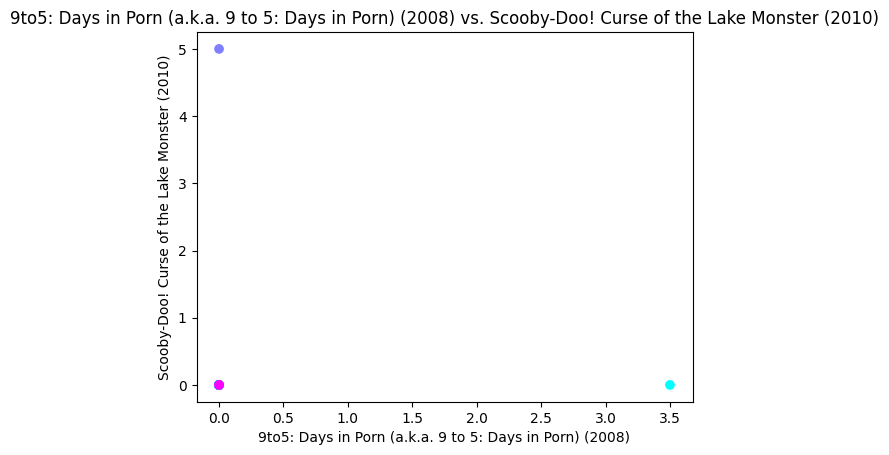

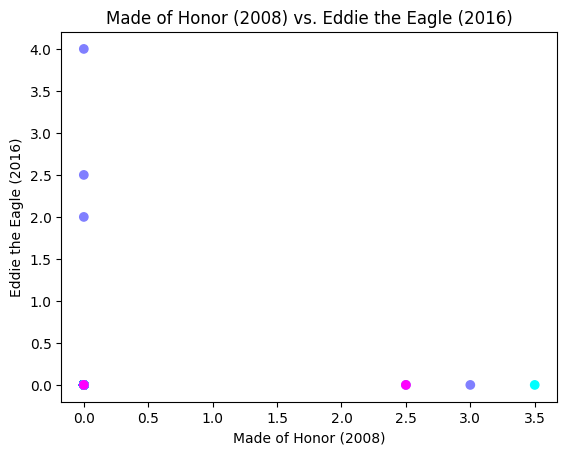

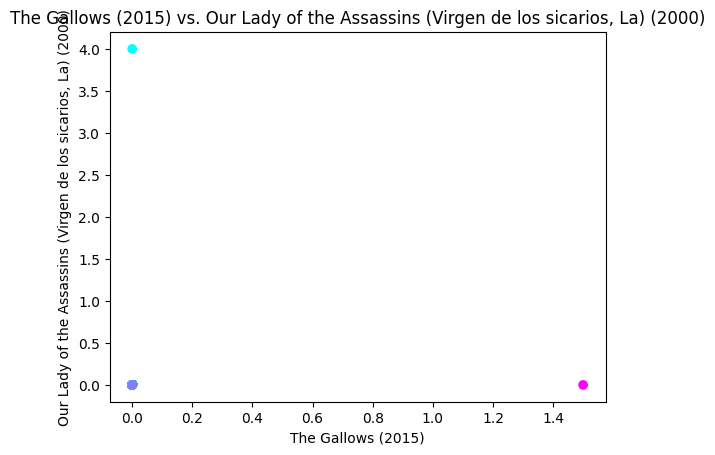

In [177]:
for i in range(10):
  xAxis = random.randint(0, 9742)
  yAxis = random.randint(0, 9742)
  plt.scatter(df[titles[xAxis]], df[titles[yAxis]], c = kmeans.labels_, cmap = "cool")
  plt.title(titles[xAxis] + " vs. " + titles[yAxis])
  plt.xlabel(titles[xAxis])
  plt.ylabel(titles[yAxis])
  plt.show()
